In [1]:
# Let's first load and inspect the uploaded dataset to understand its structure.
import pandas as pd

# Load the dataset

df = pd.read_csv('zoo.csv')

# Display the first few rows of the dataset to inspect
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


(  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
 0    aardvark     1         0     0     1         0        0         1   
 1    antelope     1         0     0     1         0        0         0   
 2        bass     0         0     1     0         0        1         1   
 3        bear     1         0     0     1         0        0         1   
 4        boar     1         0     0     1         0        0         1   
 
    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
 0        1         1         1         0     0     4     0         0        1   
 1        1         1         1         0     0     4     1         0        1   
 2        1         1         0         0     1     0     1         0        0   
 3        1         1         1         0     0     4     0         0        1   
 4        1         1         1         0     0     4     1         0        1   
 
    type  
 0     1  
 1     1  
 2     4  
 3     1  

<IPython.core.display.Javascript object>

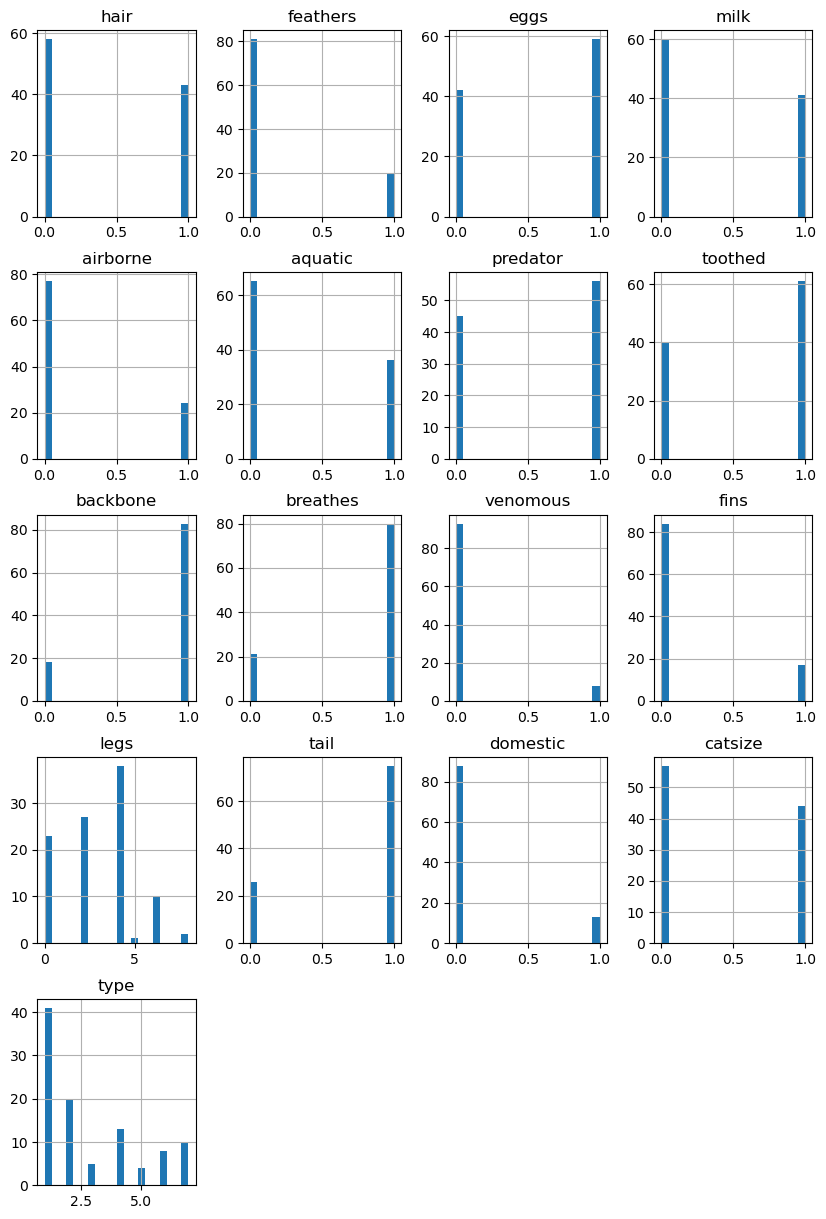

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

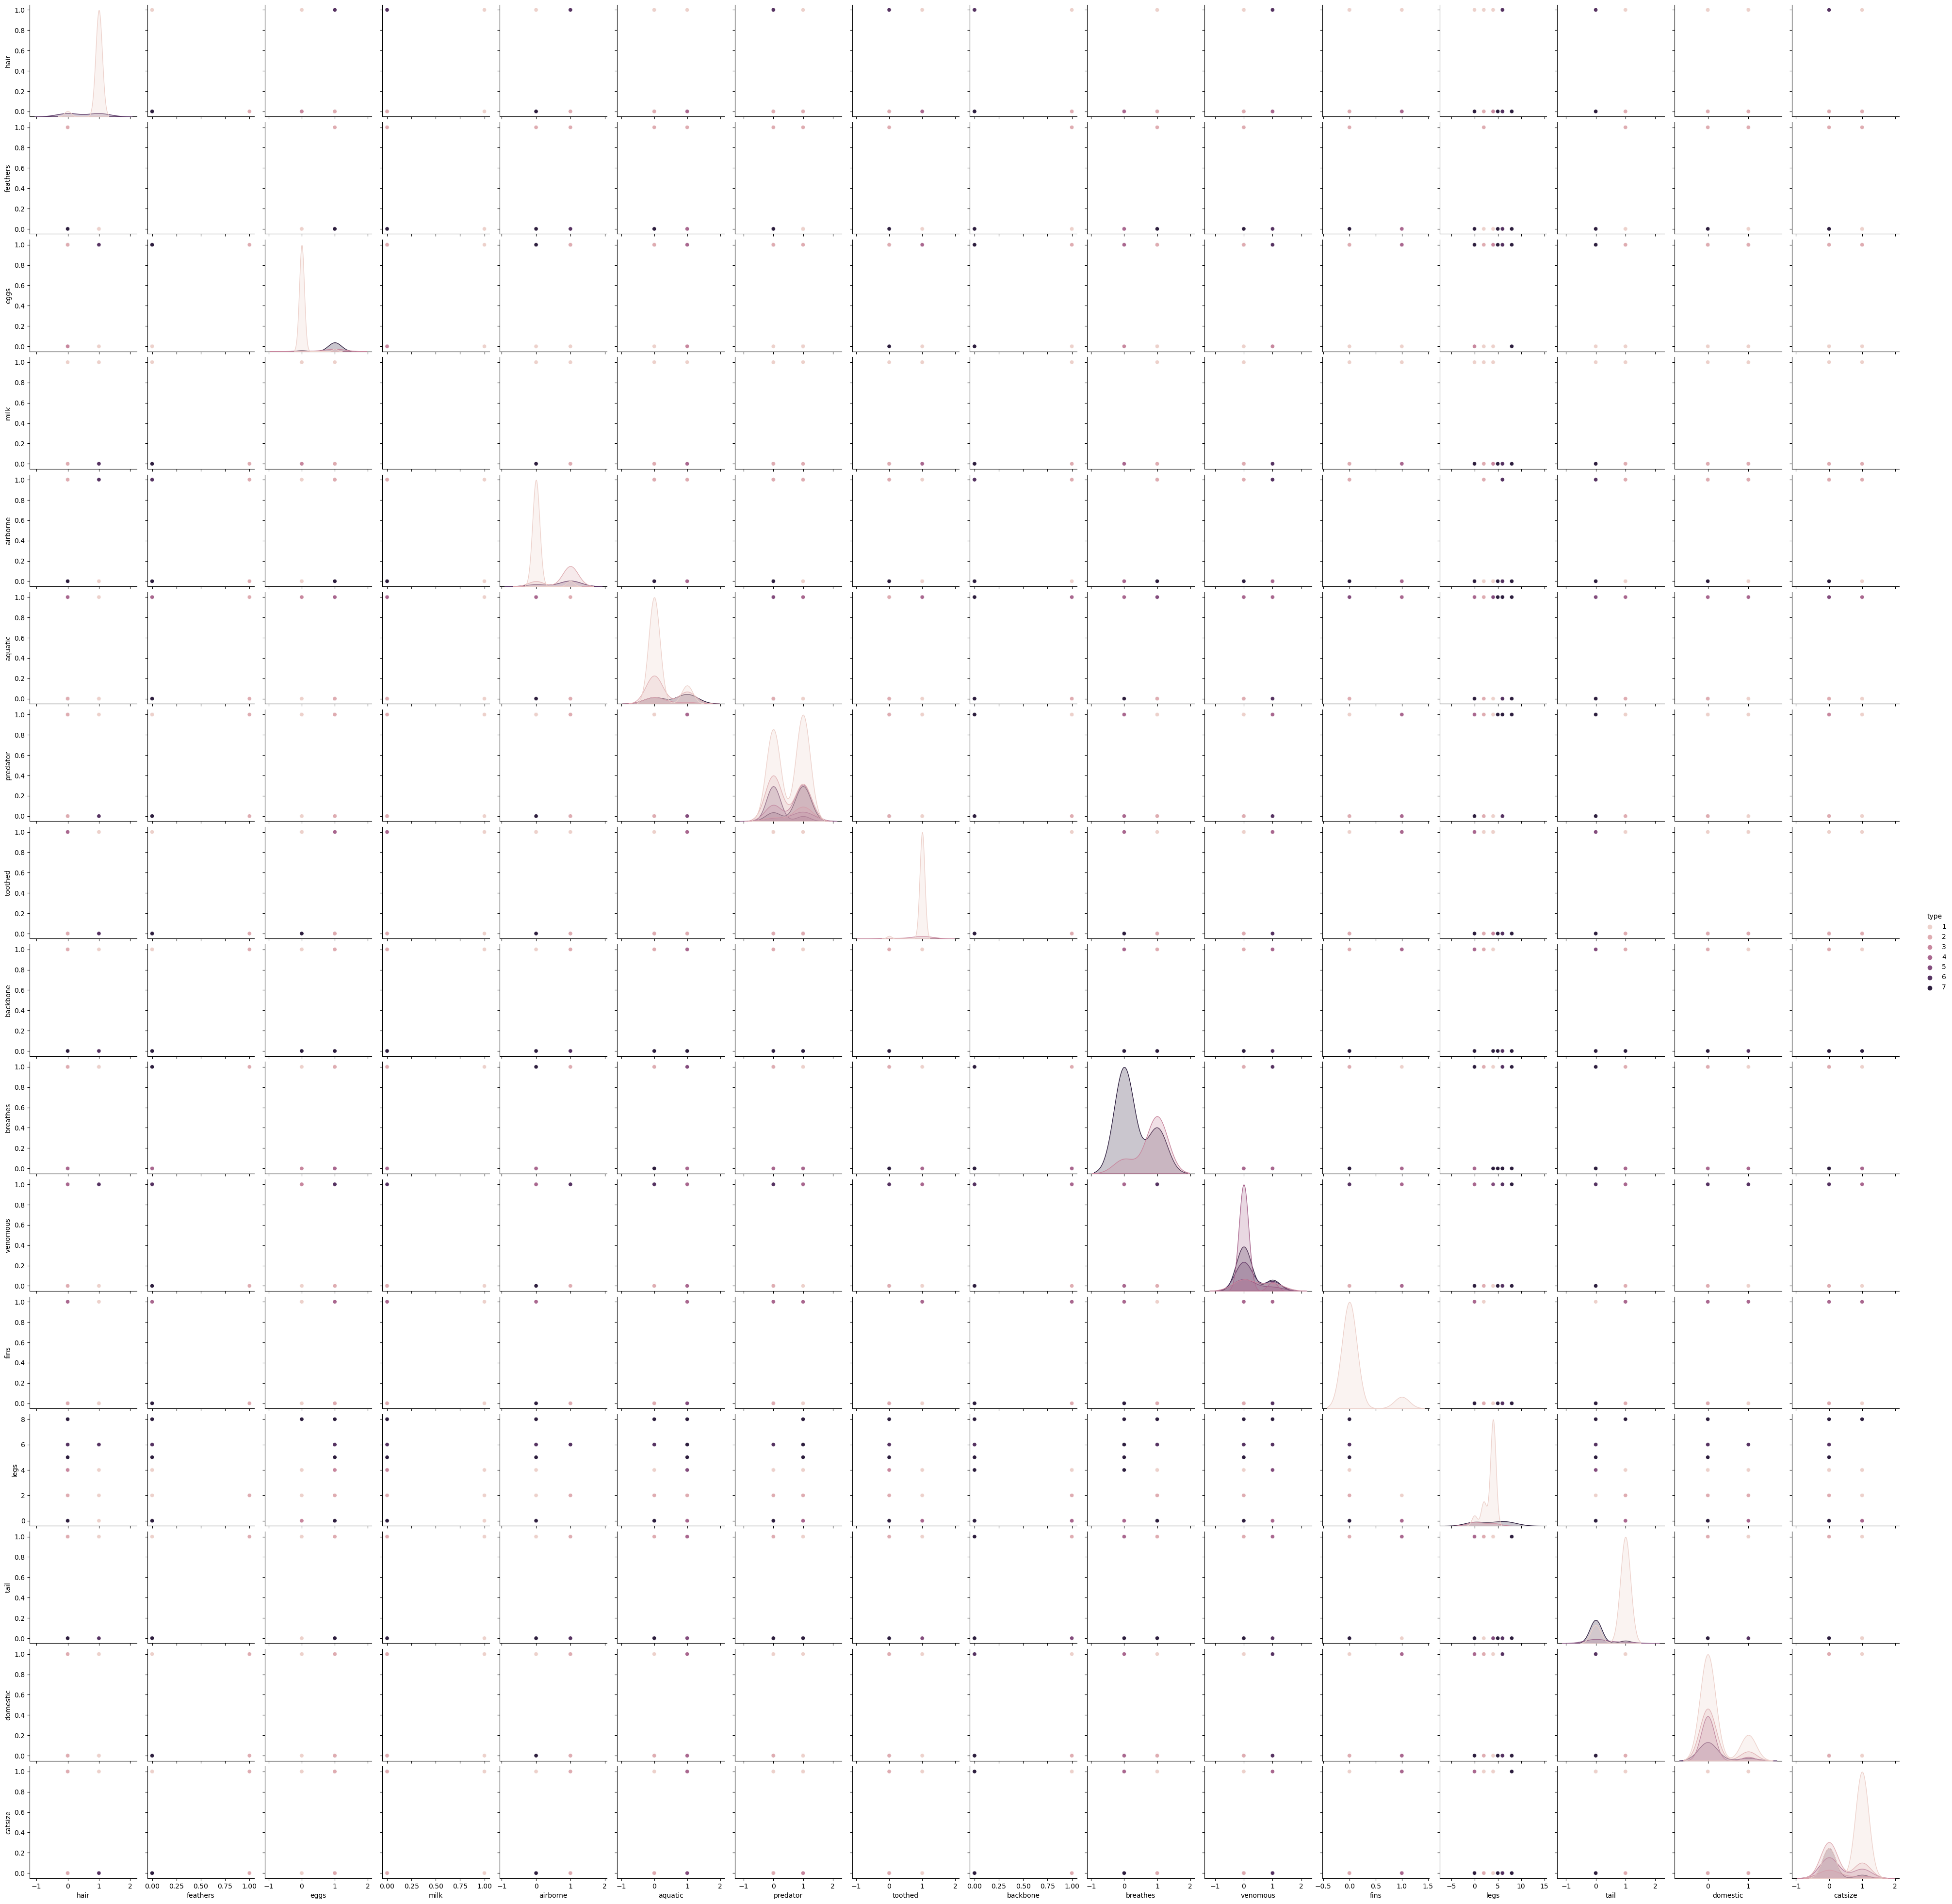

In [2]:
df.hist(bins=20, figsize=(10,15))
plt.show()

sns.pairplot(df, hue='type')  # Pairplot to visualize feature relationships
plt.show()

<IPython.core.display.Javascript object>

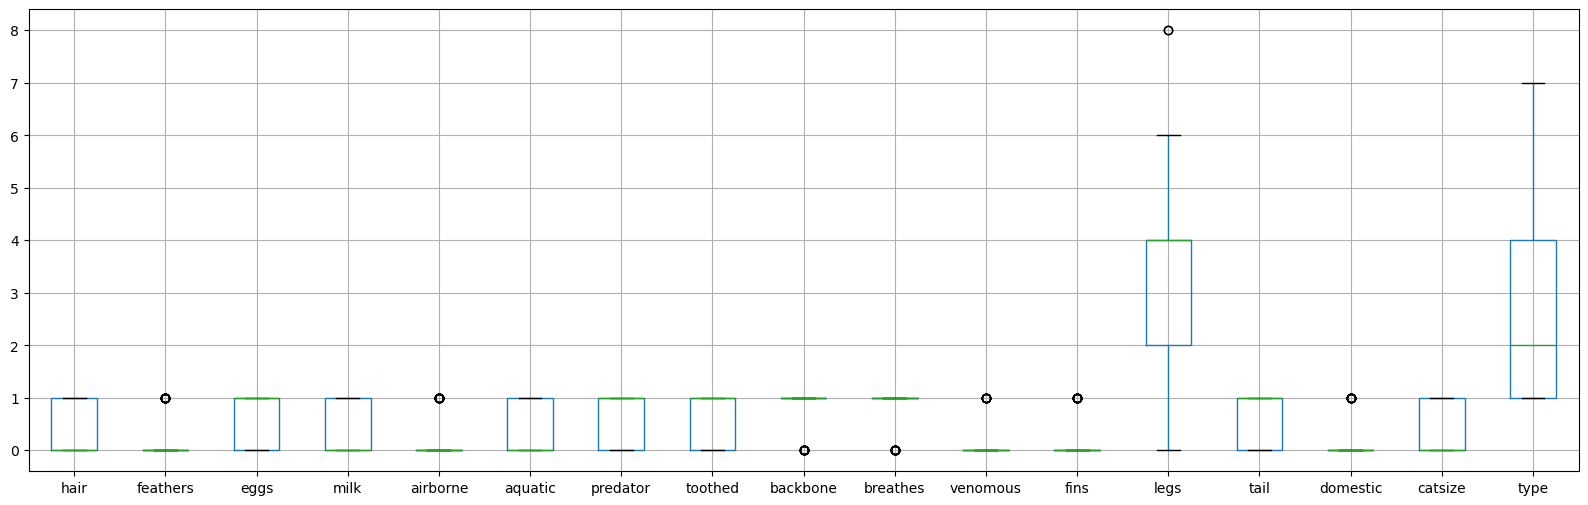

In [3]:
df.boxplot(figsize=(20,6))
plt.show()

In [4]:
# Dropping the non-numeric 'animal name' column since it's not needed for model training
X = df.drop(columns=['animal name', 'type'])  # Features
y = df['type']  # Target

# Standardize numeric features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape  # Check the shape of the splits


((80, 16), (21, 16), (80,), (21,))

In [5]:
# Implementing the K-Nearest Neighbors (KNN) algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the KNN classifier with a default value for K (e.g., K=3)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate performance: accuracy, precision, recall, F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

accuracy, precision, recall, f1, classification_rep


(1.0,
 1.0,
 1.0,
 1.0,
 '              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        12\n           2       1.00      1.00      1.00         2\n           3       1.00      1.00      1.00         1\n           4       1.00      1.00      1.00         2\n           6       1.00      1.00      1.00         3\n           7       1.00      1.00      1.00         1\n\n    accuracy                           1.00        21\n   macro avg       1.00      1.00      1.00        21\nweighted avg       1.00      1.00      1.00        21\n')

1. What are the key hyperparameters in KNN?
ans
In k-Nearest Neighbors (KNN), the key hyperparameters include:

k (number of neighbors): This determines how many neighbors to consider when making predictions. A small value may lead to overfitting, while a large value can smooth out the predictions.

Distance metric: This defines how the distance between points is calculated. Common metrics include Euclidean distance, Manhattan distance, and Minkowski distance.

Weighting: This specifies whether all neighbors contribute equally to the prediction or if closer neighbors have more influence. Options include uniform weighting (equal contribution) and distance weighting (closer neighbors have more influence).

Algorithm: This specifies the method used to compute the nearest neighbors, such as brute force, kd-tree, or ball tree.

Leaf size: In some algorithms like kd-tree, this affects the speed of the tree construction and the efficiency of querying.

P (for Minkowski distance): If using Minkowski distance, this parameter defines the power parameter (p=1 for Manhattan, p=2 for Euclidean).

2. What distance metrics can be used in KNN?
ans
In KNN, several distance metrics can be used to measure the similarity between points:

Euclidean Distance: The most common distance metric, calculated as the straight-line distance between two points in Euclidean space.

Manhattan Distance: Also known as L1 distance or taxicab distance, it measures the distance between two points by summing the absolute differences of their coordinates.

Minkowski Distance: A generalized distance metric that includes both Euclidean and Manhattan distances as special cases. The distance is calculated based on a parameter 
𝑝
p:

𝑝
=
1
p=1 for Manhattan distance.
𝑝
=
2
p=2 for Euclidean distance.
Cosine Similarity: Measures the cosine of the angle between two vectors, often used in text analysis to assess similarity in direction rather than magnitude.

Hamming Distance: Used for categorical data, it measures the number of positions at which two strings of equal length differ.

Chebyshev Distance: Measures the maximum absolute difference along any coordinate dimension, useful in chessboard-like scenarios.

Mahalanobis Distance: Takes into account the correlations of the data set and is effective in identifying outliers.